In [1]:
# Standard Imports
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
# Plotting
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 14
import seaborn as sns
%matplotlib inline

C:\Users\Erin\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Performance
from time import time

In [4]:
# Machine Learning
from sklearn.linear_model import LogisticRegression

In [5]:
# Helper
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

# Preliminaries

In [6]:
# Load the Data
train = pd.read_csv('input/train3.csv')
test = pd.read_csv('input/test3.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
0,1,0,3,1,0,1,0,22,7.2500,0,0,0,0
1,2,1,1,1,0,0,1,38,71.2833,1,0,0,0
2,3,1,3,0,0,0,0,26,7.9250,0,0,0,0
3,4,1,1,1,0,0,0,35,53.1000,1,0,0,0
4,5,0,3,0,0,1,0,35,8.0500,0,0,0,0


# Feature engineering
See features generated in visualization and exploration notebook

In [8]:
# create hold-out set

features = list(train.columns.values)[2::]
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Survived'])

# Data exploration

In [9]:
X_train.groupby(y_train).mean()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
Survived,,,,,,,,,,,
0,2.519704,0.480296,0.325123,0.847291,0.310345,30.131773,22.582305,0.014778,0.019704,0.004926,0.009852
1,1.938462,0.457692,0.461538,0.338462,0.430769,28.595538,48.809584,0.465385,0.076923,0.038462,0.030769


# Data visualization 
## for more visualizations see 'Visualization and exploration' notebook

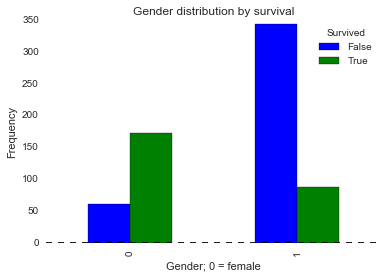

In [10]:
pd.crosstab(X_train.Gender, y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

# Feature selection

In [11]:
X_train.corr()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill,femalesHighClass,thirdClassFSingle,boysHighClass,singleMenFirstClass
Pclass,1.000000,0.088159,0.009162,0.125488,0.003815,-0.412713,-0.552484,-0.496818,0.176379,-0.100971,-0.208479
SibSp,0.088159,1.000000,0.381135,-0.108374,-0.066382,-0.233145,0.119001,0.007838,-0.059264,0.025537,-0.061682
Parch,0.009162,0.381135,1.000000,-0.231171,-0.050512,-0.151423,0.188319,0.074092,-0.059981,0.143532,-0.048586
Gender,0.125488,-0.108374,-0.231171,1.000000,-0.114209,0.087819,-0.150553,-0.659540,-0.284644,0.099694,0.099694
Port,0.003815,-0.066382,-0.050512,-0.114209,1.000000,-0.015893,0.100615,0.003818,0.267015,-0.041913,0.031352
AgeFill,-0.412713,-0.233145,-0.151423,0.087819,-0.015893,1.000000,0.132681,0.102072,-0.156196,-0.239132,0.019317
FareFill,-0.552484,0.119001,0.188319,-0.150553,0.100615,0.132681,1.000000,0.321560,-0.102025,0.056980,-0.003656
femalesHighClass,-0.496818,0.007838,0.074092,-0.659540,0.003818,0.102072,0.321560,1.000000,-0.101690,-0.065752,-0.065752
thirdClassFSingle,0.176379,-0.059264,-0.059981,-0.284644,0.267015,-0.156196,-0.102025,-0.101690,1.000000,-0.028377,-0.028377
boysHighClass,-0.100971,0.025537,0.143532,0.099694,-0.041913,-0.239132,0.056980,-0.065752,-0.028377,1.000000,-0.018349


In [13]:
ch2 = SelectKBest(chi2, k = 7)
X_train2 = ch2.fit_transform(X_train, y_train)
# ch2.get_feature_names()
# X_train2[0:10]


In [14]:
predictors = list(X_train.columns.values[ch2.get_support()])
print(predictors)

['Pclass', 'Gender', 'AgeFill', 'FareFill', 'femalesHighClass', 'thirdClassFSingle', 'boysHighClass']


# Find logistic regression hyperparameters

In [15]:
def searchHyperparameters(X, y, param_grid, alg, cval = 10, score = 'accuracy'):
    
    # instantiate the grid
    grid = GridSearchCV(alg, param_grid, cv = cval, scoring = score)
    
    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results
    print("Best score:", grid.best_score_)
    print("Best parameters:", grid.best_params_)
    print("Best model:", grid.best_estimator_)
    
    # note if SD high, cross-val estimates may not be reliable
    results = grid.grid_scores_
    return results, grid

In [16]:
# Initialize our algorithm
alg = LogisticRegression()

In [17]:
# define parameter values to be searched
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
p_range = ['l1', 'l2']
param_grid = dict(C = c_range, penalty = p_range)
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [18]:
start = time()
res, grid = searchHyperparameters(X_train[predictors], y_train, param_grid, alg, 10, 'roc_auc')
print("\nTime elapsed (s) is:", time() - start)

Best score: 0.839821411468
Best parameters: {'C': 1, 'penalty': 'l1'}
Best model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Time elapsed (s) is: 0.6174521446228027


In [19]:
[print(val) for val in res]

mean: 0.65084, std: 0.08556, params: {'C': 0.001, 'penalty': 'l1'}
mean: 0.72360, std: 0.08844, params: {'C': 0.001, 'penalty': 'l2'}
mean: 0.66666, std: 0.08430, params: {'C': 0.01, 'penalty': 'l1'}
mean: 0.81348, std: 0.07461, params: {'C': 0.01, 'penalty': 'l2'}
mean: 0.82564, std: 0.05926, params: {'C': 0.1, 'penalty': 'l1'}
mean: 0.83483, std: 0.05433, params: {'C': 0.1, 'penalty': 'l2'}
mean: 0.83982, std: 0.05839, params: {'C': 1, 'penalty': 'l1'}
mean: 0.83954, std: 0.05794, params: {'C': 1, 'penalty': 'l2'}
mean: 0.83811, std: 0.06063, params: {'C': 10, 'penalty': 'l1'}
mean: 0.83878, std: 0.06026, params: {'C': 10, 'penalty': 'l2'}
mean: 0.83849, std: 0.06065, params: {'C': 100, 'penalty': 'l1'}
mean: 0.83849, std: 0.06065, params: {'C': 100, 'penalty': 'l2'}
mean: 0.83839, std: 0.06068, params: {'C': 1000, 'penalty': 'l1'}
mean: 0.83839, std: 0.06084, params: {'C': 1000, 'penalty': 'l2'}


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [20]:
# Predict class for hold-out set.
holdout_pred = grid.predict(X_test[predictors])

# Model evaluation

In [21]:
def evaluation_metrics(ytest, ypred):
    
    # null accuracy
    null_accuracy = round(ytest.value_counts().max()/len(ytest), 3)
    print("Null accuracy:", null_accuracy)

    accuracy = round(accuracy_score(ytest, ypred), 3)
    print("Accuracy:", accuracy)
    
    confusion = confusion_matrix(ytest, ypred)
    print("Confusion matrix: actual(0,1) x predicted(0,1)\n", confusion)
    
    sensitivity = round(recall_score(ytest, ypred), 3)
    print("Sensitivity: when actual is positive, how often predicted positive", sensitivity)
    
    specificity = round(confusion[0,0]/(confusion[0,0] + confusion[0,1]), 3)
    print("Specificity: when actual is zero, how often predicted zero", specificity)

    precision = round(precision_score(ytest, ypred), 3)
    print("Precision: when predicted is positive, how often actual positive", precision)
    
    return accuracy, confusion, sensitivity, specificity, precision

In [22]:
def evaluate_prob(ytest, pred_prob):
    
    # histogram of probabilities
    plt.subplot(1, 2, 1)
    plt.hist(pred_prob, bins = 8)
    plt.xlim(0, 1)
    plt.title('Histogram of pred probabilities')
    plt.xlabel('Predicted probability of positive')
    plt.ylabel('Frequency')
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(ytest, pred_prob)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC curve")
    plt.xlabel("False positive rate (1 - specificity)")
    plt.ylabel("True positive rate (sensitivity)")
    plt.grid(True)
    
    plt.tight_layout() # adds more space between plots
    
    auc = round(roc_auc_score(y_test, predict_prob), 3)
    print("AUC score is:", auc)
    
    return fpr, tpr, thresholds, auc

In [23]:
# Use ROC curve to determine sensitivity & specificity for a given threshold
def evaluate_threshold(threshold):
    print("Sensitivity:", tpr[thresholds > threshold][-1])
    print("Specificity:", 1-fpr[thresholds > threshold][-1])

In [24]:
# Retrieve evaluation metrics
acc, conf, sens, spec, prec = evaluation_metrics(y_test, holdout_pred)

Null accuracy: 0.641
Accuracy: 0.87
Confusion matrix: actual(0,1) x predicted(0,1)
 [[137   6]
 [ 23  57]]
Sensitivity: when actual is positive, how often predicted positive 0.712
Specificity: when actual is zero, how often predicted zero 0.958
Precision: when predicted is positive, how often actual positive 0.905


In [25]:
# Predict probabilities for hold-out set
predict_prob = grid.predict_proba(X_test[predictors])[:,1]

AUC score is: 0.894


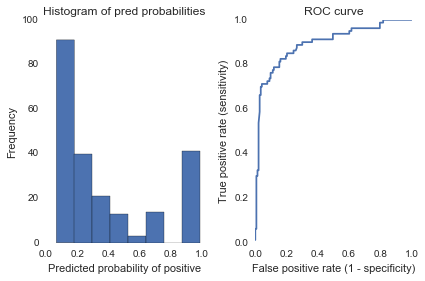

In [26]:
# Retrieve probability metrics
fpr, tpr, thresholds, auc = evaluate_prob(y_test, predict_prob)

In [26]:
# Determine class metrics for new threshold
# Note uses thresholds from histogram of probabilities, and so 0.5 does not exist
# Therefore, sensitivity is for thresholds > 0.5 (in this case 0.654)
evaluate_threshold(0.5)

Sensitivity: 0.489361702128
Specificity: 0.961240310078


In [27]:
# Determine class metrics for new threshold
evaluate_threshold(0.35)

Sensitivity: 0.606382978723
Specificity: 0.84496124031


In [28]:
# Change threshold for classification 
# One of the last steps in the model building process
from sklearn.preprocessing import binarize
y_pred_thresh = binarize(predict_prob, 0.35)[0]

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [29]:
acc, conf, sens, spec, prec = evaluation_metrics(y_test, y_pred_thresh)

Null accuracy: 0.578
Accuracy: 0.744
Confusion matrix: actual(0,1) x predicted(0,1)
 [[109  20]
 [ 37  57]]
Sensitivity: when actual is positive, how often predicted positive 0.606
Specificity: when actual is zero, how often predicted zero 0.845
Precision: when predicted is positive, how often actual positive 0.74


In [34]:
y_pred_thresh[0:10]

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.])

# Final step - submission

In [33]:
# Make predictions for test set.
test_pred = grid.predict(test[predictors])

In [34]:
test_predprob = grid.predict_proba(test[predictors])

In [35]:
test_predprob[10:20][:,1]

array([ 0.13407911,  0.28240248,  0.95278349,  0.12937447,  0.92811494,
        0.9089602 ,  0.19768806,  0.14053353,  0.38375299,  0.3094858 ])

In [36]:
test_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": test_pred
    })

# Any files you save will be available in the output tab below
submission.to_csv('submission.csv', index=False)